<a href="https://colab.research.google.com/github/yodavo/IAI_vaccines/blob/main/data_wrangling/NPL_vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paquetes**

In [1]:
# Instalar paquetes no disponibles
!pip install fuzzywuzzy
#!pip install -U dataprep

# Para importar la data
import os

# Importar para manipulacion de datos
import numpy as np
import pandas as pd
import datetime as dt
from statistics import *

# Importar para Visualizacion 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings # para evitar warnings
warnings.filterwarnings('ignore')
import textwrap
from textwrap import wrap
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Importar Dependencias
%matplotlib inline
%load_ext google.colab.data_table

# **Revision de variables**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Entrando a la carpeta de trabajo
%cd '/content/drive/MyDrive/Colab Notebooks/Diplomado-UTEC/Modulo5/dataset'

# importar de VAERSData
data = pd.read_csv('pfizer_limpio.csv', index_col=0, encoding='latin-1')
print(f'\nVAER Pfizer-Hospitalized Data tiene\t: {data.shape[0]} observaciones y {data.shape[1]} variables.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Diplomado-UTEC/Modulo5/dataset

VAER Pfizer-Hospitalized Data tiene	: 10434 observaciones y 27 variables.


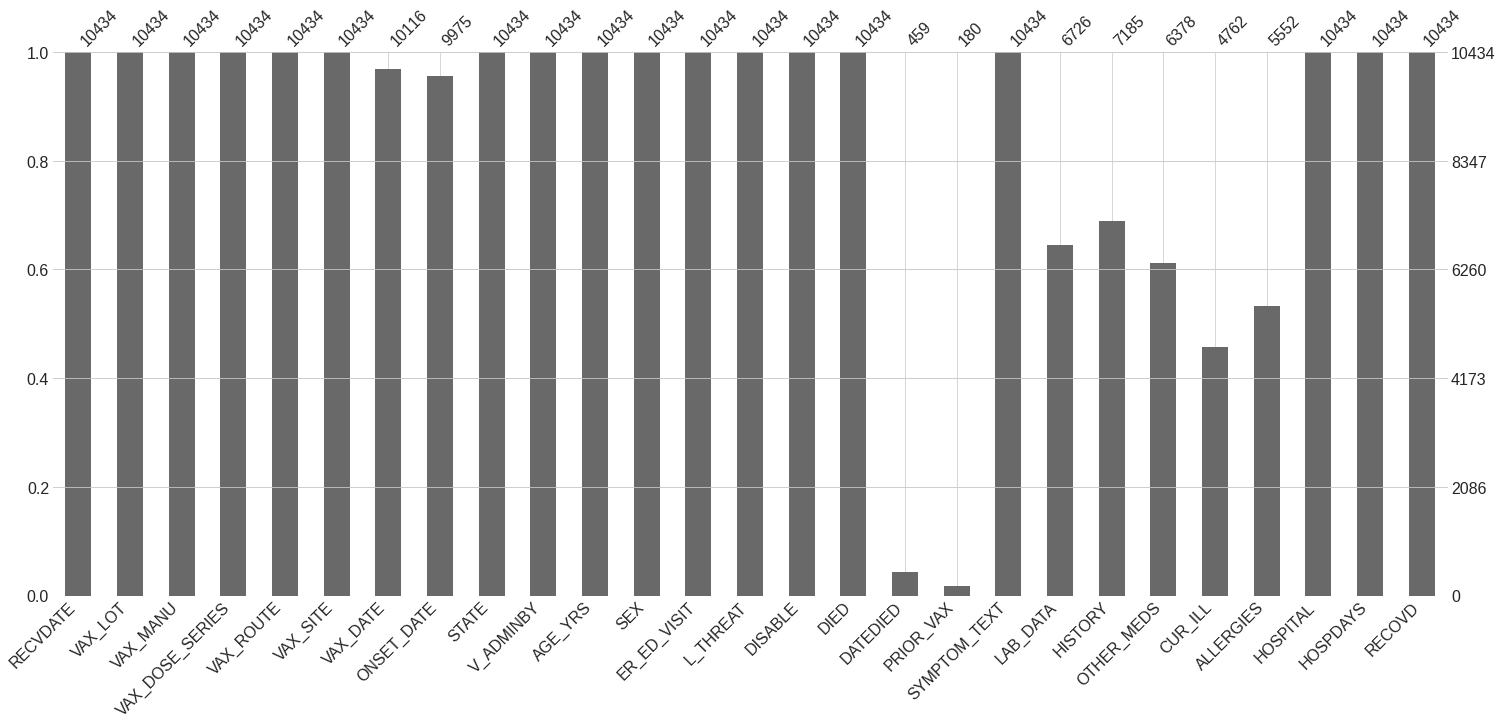

In [3]:
import missingno as msno
msno.bar(data)

In [4]:
#dataset.drop(columns = 'PRIOR_VAX', inplace=True)

In [5]:
data.CUR_ILL.value_counts()

None                                                                                                                                                                                                                 1400
none                                                                                                                                                                                                                  857
No                                                                                                                                                                                                                    123
no                                                                                                                                                                                                                     90
NONE                                                                                                                            

In [6]:
import nltk
import nltk.corpus

In [7]:
# paquetes dentro de nltk
# nltk.download('brown')
# nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [8]:
print(os.listdir(nltk.data.find('corpora')))

['wordnet', 'stopwords', 'words', 'words.zip', 'stopwords.zip', 'wordnet.zip']


In [9]:
# from nltk.corpus import brown
# brown.words()

# nltk.corpus.gutenberg.fileids()

# hamlet=nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
# hamlet

# for word in hamlet[:500]:
#   print(word, sep=' ', end=' ')

# # avanzando
# type(symptom)

# Procesando SYMPTOM


In [10]:
# quitar paabras conectoras exactas
stopwords_json_en = set(["a","a's","able","about","above","according","accordingly","across","actually","after",
                         "afterwards","again","against","ain't","all","allow","allows","almost","alone","along",
                         "already","also","although","always","am","among","amongst","an","and","another","any",
                         "anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear",
                         "appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated",
                         "at","available","away","awfully","b","be","became","because","become","becomes","becoming",
                         "been","before","beforehand","behind","being","believe","below","beside","besides","best",
                         "better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't",
                         "cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com",
                         "come","comes","concerning","consequently","consider","considering","contain","containing",
                         "contains","corresponding","could","couldn't","course","currently","d","definitely","described",
                         "despite","did","didn't","different","do","does","doesn't","doing","don't","done","down",
                         "downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough",
                         "entirely","especially","et","etc","even","ever","every","everybody","everyone","everything",
                         "everywhere","ex","exactly","example","except","f","far","few","fifth","first","five",
                         "followed","following","follows","for","former","formerly","forth","four","from","further",
                         "furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got",
                         "gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't",
                         "having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby",
                         "herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how",
                         "howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in",
                         "inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead",
                         "into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k",
                         "keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly",
                         "least","less","lest","let","let's","like","liked","likely","little","look","looking","looks",
                         "ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover",
                         "most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary",
                         "need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone",
                         "nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh",
                         "ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise",
                         "ought","our","ours","ourselves","out","outside","over","overall","own","p","particular",
                         "particularly","per","perhaps","placed","please","plus","possible","presumably","probably",
                         "provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding",
                         "regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying",
                         "says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves",
                         "sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since",
                         "six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat",
                         "somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure",
                         "t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's",
                         "thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter",
                         "thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're",
                         "they've","think","third","this","thorough","thoroughly","those","though","three","through",
                         "throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly",
                         "try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto",
                         "up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very",
                         "via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've",
                         "welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever",
                         "where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which",
                         "while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish",
                         "with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd",
                         "you'll","you're","you've","your","yours","yourself","yourselves","z","zero"])

In [11]:
symptom = "\n".join(data.SYMPTOM_TEXT.str.lower().tolist())
print("Antes:\t", len(symptom))

Antes:	 8886515


In [12]:
# Tokenizacion
from nltk.tokenize import word_tokenize
symptom_tokens = word_tokenize(symptom)
print("Despues de tokenizar:\t", len(symptom_tokens))

Despues de tokenizar:	 1634258


In [13]:
# Eliminamos palabras recurrentes de json, realizamos la limpieza
symptom = [word for word in symptom_tokens if word not in stopwords_json_en]
print('Con palabras recurrentes:', len(symptom))

Con palabras recurrentes: 985538


In [14]:
# eliminamos los signos de puntuacion
import re
punctuation=re.compile(r'[-.?!,%:;//()|0-9]')

# quitar signos de puntuacion
post_punctuation=[]

for words in symptom:
  word = punctuation.sub("", words)
  if len(word)>0:
    post_punctuation.append(word)
    
#eliminado los puntos 
print('Despues de quitar signos de puntuacion: ', len(post_punctuation))

Despues de quitar signos de puntuacion:  736581


In [15]:
# stop words
from nltk.corpus import stopwords
stopwords.words('english')

# revisanod con nltk
symptom = [word for word in post_punctuation if word not in stopwords.words('english')]

# despues de quitar pabaras stop
print('Despues de quitar palabras stop: ', len(symptom))

Despues de quitar palabras stop:  735091


# Revisando frecuencia en la bolsa de palabras

In [16]:
from nltk.probability import FreqDist
from pprint import pprint

fdist = FreqDist()

for word in symptom:
  fdist[word.lower()]+=1
print(len(fdist),'\n')

fdist_top100 = fdist.most_common(100)

### tokenizacion y bigramas
quotes_bigrams = list(nltk.bigrams(symptom))

# frecuencias
fdist2 = FreqDist(quotes_bigrams)
for k,v in fdist2.items():
    fdist2[k]+=v
print(len(fdist))

fdist2_top100 = fdist2.most_common(100)

### tokenizacion y bigramas
quotes_trigrams = list(nltk.trigrams(symptom))

# frecuencias
fdist3 = FreqDist(quotes_trigrams)
for k,v in fdist3.items():
    fdist3[k]+=v
print(len(fdist3))

fdist3_top100 = fdist3.most_common(100)

### tokenizacion y bigramas
quotes_ngrams = list(nltk.ngrams(symptom, 4))
quotes_ngrams

# frecuencias
fdist4 = FreqDist(quotes_ngrams)
for k,v in fdist4.items():
    fdist4[k]+=v
print(len(fdist4))

fdist4_top100 = fdist4.most_common(100)


20337 

20337
452735
538010


In [17]:
# Impresion de lso resultados

pprint(fdist_top100)
print()
pprint(fdist2_top100)
print()
pprint(fdist3_top100)
print()
pprint(fdist4_top100)

[('patient', 25491),
 ('covid', 14790),
 ('vaccine', 11295),
 ('dose', 9227),
 ('hospital', 6341),
 ('pain', 6325),
 ('received', 6085),
 ('reported', 5816),
 ('days', 4982),
 ('unspecified', 4981),
 ('blood', 4620),
 ('events', 4521),
 ("'s", 4261),
 ('left', 4187),
 ('vaccination', 4152),
 ('bntb', 4128),
 ('number', 4029),
 ('date', 3977),
 ('unknown', 3821),
 ('report', 3773),
 ('history', 3730),
 ('chest', 3703),
 ('included', 3688),
 ('pfizer', 3509),
 ('medical', 3391),
 ('arm', 3390),
 ('weeks', 3265),
 ('day', 3204),
 ('mar', 3179),
 ('heart', 3063),
 ('apr', 2927),
 ('admitted', 2888),
 ('started', 2740),
 ('pfizerbiontech', 2678),
 ('single', 2653),
 ('outcome', 2650),
 ('event', 2648),
 ('information', 2599),
 ('medications', 2583),
 ('emergency', 2562),
 ('hospitalized', 2541),
 ('administration', 2519),
 ('prior', 2517),
 ('lot', 2496),
 ("n't", 2423),
 ('symptoms', 2406),
 ('er', 2389),
 ('spontaneous', 2379),
 ('concomitant', 2345),
 ('route', 2310),
 ('feb', 2283),
 ('

In [18]:
para aqui

SyntaxError: ignored

# **Otras**

In [ ]:
sintomas_objetivo = ['vaccine-associated enhanced disease', 'multisystem inflammatory syndrome in children', 'acute respiratory distress syndrome',
                     'acute cardiovascular injury', 'microangiopathy', 'heart failure', 'stress cardiomyopathy', 'coronary artery disease arrhythmia',
                     'myocarditis', 'Coagulation disorder', 'thromboembolism', 'haemorrhage', 'Acute kidney injury', 'Generalized convulsion', 
                     'Acute liver injury', 'anosmia','ageusia', 'Chilblain', 'lesion', 'Single organ cutaneous vasculitis', 'Erythema multiforme', 
                     'Anaphylaxis', 'Acute aseptic arthritis', 'Meningoencephalitis', 'Acute disseminated encephalomyelitis', 'Thrombocytopenia'
                     ]
sintomas_objetivo = list(map(str.lower,sintomas_objetivo))
sintomas_objetivo.sort()

In [ ]:
# Trabajando en Text
data.SYMPTOM_TEXT.fillna('None',inplace=True) #rellenar nan
data.SYMPTOM_TEXT = data.SYMPTOM_TEXT.str.lower() # convertir en minuscula
data.SYMPTOM_TEXT = data.SYMPTOM_TEXT.str.replace('[^\w\s]',' ') # limpiar signos
data.SYMPTOM_TEXT = data.SYMPTOM_TEXT.str.rstrip() # limpiar espacios antes
data.SYMPTOM_TEXT = data.SYMPTOM_TEXT.str.lstrip() # limpiar especio despues

In [ ]:
prueba = data.head(10000)

In [ ]:
from fuzzywuzzy import fuzz

for i in sintomas_objetivo:
  prueba[i] = ""
  print('Sintoma: ', i)
  for j in prueba.SYMPTOM_TEXT:
    if fuzz.partial_ratio(i,j) > 80:
      print(i,'---',j)
      prueba[i,j] = 1
    else:
      prueba[i] = 0


# # Make new columns indicating what will be imputed
# for col in cols_with_missing:
#     X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
#     X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

In [ ]:
data.loc[data.SYMPTOM_TEXT.str.contains('hrombocytopenia', na=False)].shape

In [ ]:
symptom.head(100)

In [ ]:
symptom.SYMPTOM1

In [ ]:
sympotom1.value_counts().head(100)

In [ ]:
symptom[symptom.SYMPTOM1.str.contains('oagulopathy')]

#### history

In [ ]:
# analisis de HISTORY
dataset_covid['HISTORY'] = dataset_covid['HISTORY'].str.lower().replace(palabras_errones, np.nan) # reemplazando valores incorrectos
dataset_covid.HISTORY.dropna().value_counts().sum() # revision de cantidad de valores utiles

In [ ]:
# VACUNAS PREVIAS

# nka = not known allergies

allergies = ['nka', 'nkda','no allergies', 'no known drug allergies', 
             'no known allergies.', 'no know allergies', 'no known allergies']
removew += allergies

dataset_covid['ALLERGIES'] = dataset_covid['ALLERGIES'].str.lower().replace(removew, np.nan) # incorrect values
dataset_covid.ALLERGIES.str.lower().value_counts()

# Tratamiento de Variables

In [ ]:
# Trabajo de Laboratorio -- MALA variable
removew = ['unknown', 'no', 'n/a', 'na', 'none yet', 'see above',
       'none at this time', 'none.', 'none to date', 'none yet.',
       'none reported', 'none so far', 'none known', 'not applicable',
       'none at this time.', 'blood work', 'see above.', 'non', 'none done',
       '0', 'as above', 'ultrasound', 'none needed', 'no.',
       'none taken', 'no tests','as above.', 'n/a.','none performed',
       'none as of yet', 'unknown.', 'none so far.', 'not known', 'pending',
       'no e', 'none', 'vital signs', 'none to date.', 'not yet',
       '?', '-', 'vitals', 'lab work', 'unk', 'no tests done', 
       'nothing', 'none noted', 'unkown', 'none required', 'no tests.',
       'denies','unknown at this time', 'vitals were taken - normal',
       'no medical test']

dataset_covid['LAB_DATA'] = dataset_covid['LAB_DATA'].str.lower().replace(removew, np.nan) # incorrect values
dataset_covid.LAB_DATA.dropna().value_counts().head(100).index


In [ ]:
# Otras medicaciones por historial
omeds = ['none', 'unknown', 'no', 'none.', 'n/a','unk', 'na','unk', 'na',
            'nothing', 'none listed', 'none reported','no medications',
            'unkown', 'no known', 'non', 'not reported', 'none noted', '0',
            'no.','not available']
removew += omeds

dataset_covid['OTHER_MEDS'] = dataset_covid['OTHER_MEDS'].str.lower().replace(removew, np.nan) # incorrect values
dataset_covid.OTHER_MEDS.value_counts()

In [ ]:
# Otras medicaciones por historial
ill = ['none known', 'no illnesses', 'no acute illness', 'no acute illnesses', 
       'none known.', 'no known illnesses', 'unknown.', 'denied',
       'i did not have any other illnesses.', 'none stated', 'no other illnesses', 
       'not applicable', 'no other illnesses.','none reported.', '-', 'no e',
       'none per patient','none documented', 'zero', 'nonr', 'none disclosed',
       'no illnesses at the time of vaccination.', 'none that i am aware of',
       'no illnesses.', '?', 'nome', 'non-smoker', 'n/a.', 'nope',
       'no known illness', 'nothing acute', 'none indicated',
       'no other illnesses at the time of vaccination and up to one month prior.',
       'no illness date of vaccination, unknown prior', 'none acute', 
       'none that i know of', 'unsure','none identified', 'none,', 'nonw', 
       'none reported by patient', 'no other illness', 'no  other illnesses.']
removew += ill

dataset_covid['CUR_ILL'] = dataset_covid['CUR_ILL'].str.lower().replace(removew, np.nan) # incorrect values
dataset_covid.CUR_ILL.value_counts()

In [ ]:
# HISTORIAL MEDICO
historial = ['comments: list of non-encoded patient relevant history: patient other relevant history 1: none',
             'medical history/concurrent conditions: no adverse event (no reported medical history)',
             'medical history/concurrent conditions: no adverse event (no medical history reported)',
             'medical history/concurrent conditions: no adverse event (no reported medical history.)',
             'medical history/concurrent conditions: no adverse event (no medical history reported.)',
             'comments: no medical history was provided by the reporter.','not known', 'comments: unknown'
             ]
removew += historial

dataset_covid['HISTORY'] = dataset_covid['HISTORY'].str.lower().replace(removew, np.nan) # incorrect values
dataset_covid.HISTORY.value_counts()

In [ ]:
# VACUNAS PREVIAS JAJJAJA
dataset_covid['PRIOR_VAX'] = dataset_covid['PRIOR_VAX'].str.lower().replace(removew, np.nan) # incorrect values
dataset_covid.PRIOR_VAX.value_counts()

# Notas previas

POSIBLES OBJETIVOS DEL TRABAJO DE INVESTIGACION:

1. Personalizacion de las vacunas Moderna, Pfizer  y Johnson & Johnson pra reducir efectos adversos en perfiles especificos en pacientes. Este objetivo requeriria de un dataset de control con pacientes que no presentaron reacciones adversas a las vacunas.

- Target: tipo de vacuna
- Features: Datos de los pacientes (alergias, comorbolidades, edad, sexo, 
enfermedades cronicas y actuales (historia clinica), vacunas previas, sintomas post aplicacion, hospitalizacion y dias de hospitilizacion, discapacidades...)

2. Series de tiempo frente antes y despues de la fecha de vacunacion.

3. Predecir el sexo y/o rango de edad basado en los sintomas presetnados post aplicacion de las vacunas A. B.

4. Predecir si el paciente requiere hospitalizacion basado en los sintomas que presenta al inocularse la vacuna por clusters (no supervisado).

5. Predecir que sintomas puede presentar el paciente en base a su sexo y la vacuna inoculada.

## Revisando repeticiones (codigo extra)


In [ ]:
# revision de valores exagerados
revision = merged.loc[1215401]

for i in revision.columns:
  repetidos = list(set(revision[i]))
  limpio = [x for x in repetidos if str(x) != 'nan']
  if len(limpio) > 2:
    print('\n*****Variable:', i, '*****')
    pprint(limpio)